# Space Element Reduction Model animation
Author: Tuomas Sorakivi, Tommy Leon Wood

MovieWriter imagemagick unavailable; using Pillow instead.


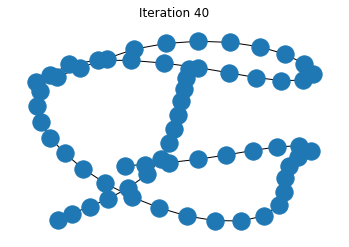

None

In [93]:
import random
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
from matplotlib import animation

TS=40
pd=0.2
ps=0.1

SEn=1
SEin=2
SEinSet=["s1"]

PPn=2
PPin=3
PPinSet=["p1","p2"]
SEset = {
    "s1" :  ["x1","x2"]
}

PPset= {
    "p1" :  ["x1"],
    "p2" :  ["x2"]
}

IGset={
    "x1" : ["p1","s1"],
    "x2" : ["s1","p2"]
}

IGn=2
IGin=3

PSBn=0
PSBin=1
PSBset={
}
PSBinSet=[]

PPsSplitInd=[2,2]

HGev=[]
HGev.append(list(SEset.values()))

def replaceEl(oldEl,newEl,array):
    for i1 in range(len(array)):
        if array[i1]==oldEl:
             array[i1]=newEl
             break
    return array

def removeEl(el,array):
    for i1 in range(len(array)):
        if array[i1]==el:
            array.pop(i1)
            break
    return array

for t in range(TS):

    duplications=random.sample(SEinSet, PPn-1)
    SEnTemp=SEn
    for s in range(len(duplications)):
        SEind=duplications[s]
        IGin1=SEset[SEind][1]
        IGin2="x"+str(IGin)
        SEin1="s"+str(SEin)
        SEset[SEind][1]=IGin2
        SEset[SEin1]=[IGin2,IGin1]
        IGset[IGin2]=[SEind,SEin1]
        replaceEl(SEind,SEin1,IGset[IGin1])
        if PSBset.get(IGin1)!=None:
            if PSBset[IGin1]==SEind:
                PSBset[IGin1]=SEin1
        SEinSet.append(SEin1)
        SEin+=1
        SEnTemp+=1
        IGin+=1
        IGn+=1
    SEn=SEnTemp

    PPnTemp=PPn
    for p in range(PPn):
        rand=random.random()
        psSlow=ps/PPn
        if p>0:
            if PPsSplitInd[p]==1:
                if rand<psSlow:
                    PPind=PPinSet[p]
                    IGin1=PPset[PPind][0]
                    PPin1="p"+str(PPin)
                    PPset[PPin1]=[str(PPset[PPind][0])]
                    PSBinSet.append(IGin1)
                    SEin1=""
                    for x in range(len(IGset[IGin1])):
                        if IGset[IGin1][x]!=PPind:
                            SEin1=IGset[IGin1][x]
                            break
                    PSBset[IGin1]=SEin1
                    PSBn+=1
                    IGset[IGin1].append(PPin1)
                    PPinSet.append(PPin1)
                    PPin+=1
                    PPnTemp+=1
                    PPsSplitInd[p]=0
                    PPsSplitInd.append(0)
            else:
                PPsSplitInd[p]=1
    PPn=PPnTemp

    if PSBn>0:
        PSBnTemp=PSBn
        shift=0
        for b in range(PSBn):
            PSBind=PSBinSet[b-shift]
            ELin1=PSBset[PSBind]
            IGin1=PSBind
            ELfrom=""

            if IGset[IGin1][0]!=ELin1:
                if IGset[IGin1][1]!=ELin1:
                    ELfrom=IGset[IGin1][1]
                    IGset[IGin1].pop(1)
                else:
                    ELfrom=IGset[IGin1][2]
                    IGset[IGin1].pop(2)
            else:
                ELfrom=IGset[IGin1][2]
                IGset[IGin1].pop(2)


            if ELin1[:1]=="s":
                IGin2="x"+str(IGin)
                SEin2="s"+str(SEin)

                IGprop1=""
                if SEset[ELin1][0]==IGin1:
                    IGprop1=SEset[ELin1][1]
                else:
                    IGprop1=SEset[ELin1][0]

                ELprop1=""
                if IGset[IGprop1][0]==ELin1:
                    ELprop1=IGset[IGprop1][1]
                else:
                    ELprop1=IGset[IGprop1][0]
                PSBset[IGprop1]=ELprop1
                PSBinSet[b-shift]=IGprop1

                IGset[IGin2]=[ELfrom,SEin2]
                SEset[SEin2]=[IGin2,IGprop1]

                IGset[IGprop1].append(SEin2)

                if ELfrom[:1]=="s":
                    if SEset[ELfrom][0]==IGin1:
                        SEset[ELfrom][0]=IGin2
                    else:
                        SEset[ELfrom][1]=IGin2
                else:
                        PPset[ELfrom][0]=IGin2

                SEinSet.append(SEin2)
                IGin+=1
                IGn+=1
                SEin+=1
                SEn+=1
            else:
                IGin2="x"+str(IGin)
                IGset[IGin2]=[ELin1,ELfrom]

                if SEset[ELfrom][0]==IGin1:
                    SEset[ELfrom][0]=IGin2
                else:
                    SEset[ELfrom][1]=IGin2

                PPset[ELin1].append(IGin2)
                IGin+=1
                IGn+=1

                PSBinSet.pop(b-shift)
                shift+=1
                PSBnTemp-=1
        PSBn=PSBnTemp

    if len(PPset["p1"])>1:
        for c in range(len(PPset["p1"])):
            SEset["c"+str(c)]=[1,PPset["p1"][c]]
        HGev.append(list(SEset.values()))
    else:
        HGev.append(list(SEset.values()))

def add_edge(edge, G):
    G.add_edge(edge[0], edge[1])
    return G
        
def simple_update(num, size, ax, HGev):
    ax.clear()
    G = nx.Graph()
    nodes = HGev[num]
    for edge_collection in nodes:
        G = add_edge(edge_collection, G)
                
    layout = nx.spring_layout(G)
    nx.draw(G, pos=layout,  ax=ax)
    ax.set_title("Iteration {}".format(num))

def create_animation(HGev):
    fig, ax = plt.subplots(figsize=(6,4))
    size = len(HGev)
    ani = animation.FuncAnimation(fig, simple_update, frames=size, fargs=(size, ax, HGev))
    ani.save('SpanningTreeFromSplittingA1_1.gif', writer='imagemagick')
    display(plt.show())
        
f = open(".//Test1.txt", "w")
f.write(str(HGev))
f.close()

create_animation(HGev)